<a href="https://colab.research.google.com/github/MartaCampagnoli/PageRank-MovieActors/blob/main/Colab%20Notebooks/Dataset_Preparation_(Kaggle_and_Google_Drive_Files).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import io
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
figure(figsize=(100, 100), dpi=80)
from networkx import pagerank

<Figure size 8000x8000 with 0 Axes>

In [ ]:
pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Functions

In [ ]:
def edgelistdirected(l1, l2):
    edgelist=[]
    for i in l1:
        for j in l2:
            if i[0] != j[0]:
                if i[1] == j [1] and i != j:
                        edgelist.append((i[0], j[0]))
    return edgelist

def listcreation(d):
    l1 =[]
    l2=[]
    l1 = d['movieactorlist'].values.tolist()
    l2 = d['movieactorlist'].values.tolist()
    return l1, l2

def listcreation2(d):
    l1 =[]
    l2=[]
    l1 = d['movieactorlist2'].values.tolist()
    l2 = d['movieactorlist2'].values.tolist()
    return l1, l2

## Creating the Movie-Actors Network : merging data

In [ ]:
from google.colab import files #kaggle.json import
files.upload() 

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download --d ashirwadsangwan/imdb-dataset
! unzip imdb-dataset.zip

In [ ]:
file1 = ('title.principals.tsv/data.tsv')
data = pd.read_csv(file1, sep='\t')

In [ ]:
data.loc[data['category'].str.contains('actor', case=False), 'isactor'] = 'actor' #extract from category column actors and create a new column
data.loc[data['category'].str.contains('actress', case=False), 'isactor'] = 'actor'

In [ ]:
data = data.dropna(subset=['isactor']) ##drop non actors
data.shape

(20815083, 7)

In [ ]:
data.head()

,tconst,ordering,nconst,category,job,characters,isactor
11,tt0000005,1,nm0443482,actor,\N,"[""Blacksmith""]",actor
12,tt0000005,2,nm0653042,actor,\N,"[""Assistant""]",actor
16,tt0000007,1,nm0179163,actor,\N,\N,actor
17,tt0000007,2,nm0183947,actor,\N,\N,actor
21,tt0000008,1,nm0653028,actor,\N,"[""Sneezing Man""]",actor


In [ ]:
list(set(list(data['isactor'])))
 #various test to check filtering 

['actor']

In [ ]:
list(set(list(data['category'])))

['actor', 'actress']

In [ ]:
file2 = ('title.basics.tsv/data.tsv')
data2 = pd.read_csv(file2, sep='\t')

In [ ]:
data2.head()

C:\Users\carla\AppData\Local\Temp\ipykernel_4692\1169437740.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data2=pd.read_csv("C:/Users/carla/Downloads/archivio/title.basics.tsv/data.tsv", sep='\t')


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [ ]:
list(set(list(data2['titleType'])))

['tvMiniSeries',
 'tvSpecial',
 'videoGame',
 'tvSeries',
 'tvMovie',
 'movie',
 'video',
 'tvPilot',
 'tvEpisode',
 'tvShort',
 'short']

In [ ]:
data2b = data2[(data2.titleType == "movie")| (data2.titleType == "tvMovie")] #we filter other media type so to only have movies
data2b.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
498,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography"
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama
610,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907,\N,\N,Drama


In [ ]:
file4 = ('name.basics.tsv/data.tsv')
data4 = pd.read_csv(file4, sep='\t')

In [ ]:
data4a = data4.dropna()

In [ ]:
data4a.loc[data4a['primaryProfession'].str.contains('actor', case=False, na=False), 'isactor'] = 'actor''
data4a.loc[data4a['primaryProfession'].str.contains('actress', case=False,na=False), 'isactor'] = 'actor'
data4a = data4a.dropna(subset=['isactor'])
data4a.head() #extract people who have worked as actors at least once

C:\Users\carla\AppData\Local\Temp\ipykernel_4692\4286391651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4a.loc[data4a['primaryProfession'].str.contains('actor', case=False, na=False), 'isactor'] = 'actor'


,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,isactor
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0053137,tt0050419,tt0031983",actor
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0117057,tt0038355,tt0037382,tt0071877",actor
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0056404,tt0057345,tt0049189,tt0054452",actor
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0078723,tt0080455,tt0072562,tt0077975",actor
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050976,tt0083922,tt0060827,tt0050986",actor


In [ ]:
data4a.shape

(9479708, 7)

In [ ]:
datanew = pd.merge(left=data4a, right=data, on='nconst') #match actors with their code in order to have a row for each movie any actor worked in 
#quicker than cleaning and duplicating the knownForTitles column

In [ ]:
datanew.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,isactor_x,tconst,ordering,category,job,characters,isactor_y
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0053137,tt0050419,tt0031983",actor,tt0025164,1,actor,\N,"[""Guy Holden""]",actor
1,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0053137,tt0050419,tt0031983",actor,tt0026942,2,actor,\N,"[""Huck Haines""]",actor
2,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0053137,tt0050419,tt0031983",actor,tt0027125,1,actor,\N,"[""Jerry Travers""]",actor
3,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0053137,tt0050419,tt0031983",actor,tt0027630,1,actor,\N,"[""Bake Baker""]",actor
4,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0053137,tt0050419,tt0031983",actor,tt0028333,1,actor,\N,"[""Lucky Garnett""]",actor


In [ ]:
datanew2 = pd.merge(left=data2b, right=datanew, on='tconst') #match each movie with every actor that worked in the movie

In [ ]:
datanew2.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,nconst,...,birthYear,deathYear,primaryProfession,knownForTitles,isactor_x,ordering,category,job,characters,isactor_y
0,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,nm0063086,...,1878,1951,actress,tt0000009,actor,1,actress,\N,"[""Miss Geraldine Holbrook (Miss Jerry)""]",actor
1,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,nm0183823,...,1875,1933,actor,"tt0021535,tt0020355,tt0000009,tt0020403",actor,2,actor,\N,"[""Mr. Hamilton""]",actor
2,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,nm1309758,...,1834,1928,"actor,writer","tt0000009,tt1076833,tt0490842,tt4484306",actor,3,actor,\N,"[""Chauncey Depew - the Director of the New Yor...",actor
3,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N,nm0215752,...,\N,\N,actor,tt0000502,actor,1,actor,\N,\N,actor
4,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N,nm0252720,...,\N,\N,actor,tt0000502,actor,2,actor,\N,\N,actor


In [ ]:
datanew3 = datanew2.drop(['titleType', 'originalTitle', 'isAdult', 'endYear', 'job', 'isactor_x', 'isactor_y', 'knownForTitles'], axis = 1)

In [ ]:
datanew4 = datanew3.sort_values("primaryName")

In [ ]:
datanew4.head()

,tconst,primaryTitle,startYear,runtimeMinutes,genres,nconst,primaryName,birthYear,deathYear,primaryProfession,ordering,category,characters
1035398,tt10039392,The Ghindaring,\N,80,"Adventure,Drama,Family",nm10555718,'Aunty' Mary Hooker,\N,\N,actress,1,actress,"[""Nan""]"
10655,tt0007353,A Sister of Six,1916,50,"Adventure,Drama,Western",nm0211329,'Baby' Carmen De Rue,1908,1986,actress,9,actress,"[""Priscilla""]"
17338,tt0009055,Fan Fan,1918,50,"Comedy,Drama",nm0211329,'Baby' Carmen De Rue,1908,1986,actress,3,actress,"[""Lady Shoo""]"
7162,tt0006338,Acquitted,1916,50,Drama,nm0211329,'Baby' Carmen De Rue,1908,1986,actress,4,actress,"[""Nellie Carter""]"
11843,tt0007669,The Babes in the Woods,1917,50,"Drama,Family,Fantasy",nm0211329,'Baby' Carmen De Rue,1908,1986,actress,4,actress,"[""The Good Fairy""]"


In [ ]:
datanew4['freq'] = datanew4.groupby('primaryName')['primaryName'].transform('count') #count how many movies every actor has been in
datanew4.head()

,tconst,primaryTitle,startYear,runtimeMinutes,genres,nconst,primaryName,birthYear,deathYear,primaryProfession,ordering,category,characters,freq
1035398,tt10039392,The Ghindaring,\N,80,"Adventure,Drama,Family",nm10555718,'Aunty' Mary Hooker,\N,\N,actress,1,actress,"[""Nan""]",1
10655,tt0007353,A Sister of Six,1916,50,"Adventure,Drama,Western",nm0211329,'Baby' Carmen De Rue,1908,1986,actress,9,actress,"[""Priscilla""]",5
17338,tt0009055,Fan Fan,1918,50,"Comedy,Drama",nm0211329,'Baby' Carmen De Rue,1908,1986,actress,3,actress,"[""Lady Shoo""]",5
7162,tt0006338,Acquitted,1916,50,Drama,nm0211329,'Baby' Carmen De Rue,1908,1986,actress,4,actress,"[""Nellie Carter""]",5
11843,tt0007669,The Babes in the Woods,1917,50,"Drama,Family,Fantasy",nm0211329,'Baby' Carmen De Rue,1908,1986,actress,4,actress,"[""The Good Fairy""]",5


In [ ]:
datanew4 = datanew4[(datanew4.freq != 1 )] #drop all actors that have been in only one movie: they will not connect any two movies


,tconst,primaryTitle,startYear,runtimeMinutes,genres,nconst,primaryName,birthYear,deathYear,primaryProfession,ordering,category,characters,freq
10655,tt0007353,A Sister of Six,1916,50,"Adventure,Drama,Western",nm0211329,'Baby' Carmen De Rue,1908,1986,actress,9,actress,"[""Priscilla""]",5
17338,tt0009055,Fan Fan,1918,50,"Comedy,Drama",nm0211329,'Baby' Carmen De Rue,1908,1986,actress,3,actress,"[""Lady Shoo""]",5
7162,tt0006338,Acquitted,1916,50,Drama,nm0211329,'Baby' Carmen De Rue,1908,1986,actress,4,actress,"[""Nellie Carter""]",5
11843,tt0007669,The Babes in the Woods,1917,50,"Drama,Family,Fantasy",nm0211329,'Baby' Carmen De Rue,1908,1986,actress,4,actress,"[""The Good Fairy""]",5
13616,tt0008144,Jack and the Beanstalk,1917,100,Fantasy,nm0211329,'Baby' Carmen De Rue,1908,1986,actress,4,actress,"[""The King of Cornwall""]",5


In [ ]:
datanew5= datanew4.sort_values("primaryTitle")

The network now contains all necessary data to create nodes and edges to create a network. Using the Networkx package, the "Primary Title" column can be used to create nodes (double nodes arenot allowed, so the fact that each title appears more than once does not constitue a problem). A function has been created to get edges, which, once the nodes have been properly mapped to indeces, are the data we need for the PageRank algorithm.

In order to avoid repeating the first part of the process for later use, we save this version of the file for further processing.

In [ ]:
compression_opts = dict(method='zip',
                        archive_name='out2.csv')  
datanew5.to_csv('out2.zip', index=False,
          compression=compression_opts) #save file for future use 

## Creating the Movie-Actors Network : nodes, edges, preliminary visualization

Because of hardware limitations, the following part of the project contains the same process twice; the first is a simplified process to create a small network of only two actors on which I tested the various steps of the work to check for its functioning; the second part creates a larger (although restricted with respect to the entire dataset) network on which i ran the algorithm.

In [ ]:
datanew5 = pd.read_csv("./networkprep.csv") #import file from the Dataset Preparation (Kaggle and Google Drive) folder 

In [ ]:
datanew5.head()

,tconst,primaryTitle,startYear,runtimeMinutes,genres,nconst,primaryName,birthYear,deathYear,primaryProfession,ordering,category,characters,freq
0,tt6915008,#1,\N,\N,Documentary,nm0285330,Forbes Riley,1960,\N,"actress,producer",2,actress,\N,6
1,tt6915008,#1,\N,\N,Documentary,nm0634760,Peter Noone,1947,\N,"actor,soundtrack",1,actor,\N,6
2,tt6915008,#1,\N,\N,Documentary,nm1643411,Tommy James,1947,\N,"soundtrack,composer",5,actor,\N,2
3,tt6915008,#1,\N,\N,Documentary,nm1866067,Scotty Bowman,1933,\N,actor,6,actor,\N,2
4,tt2346170,#1 Serial Killer,2013,87,Horror,nm0002245,Tzi Ma,\N,\N,"actor,producer",3,actor,"[""Mr. Chang""]",15


In [ ]:
datanew5a = datanew5[['tconst', 'primaryTitle', 'nconst', 'primaryName']] 
datanew5a.head()

#for ease of visualisation we reduce the dataset to movie, actors, and corresponding codes

,tconst,primaryTitle,nconst,primaryName
0,tt6915008,#1,nm0285330,Forbes Riley
1,tt6915008,#1,nm0634760,Peter Noone
2,tt6915008,#1,nm1643411,Tommy James
3,tt6915008,#1,nm1866067,Scotty Bowman
4,tt2346170,#1 Serial Killer,nm0002245,Tzi Ma


In [ ]:
compression_opts = dict(method='zip',
                        archive_name='out7.csv')  
datanew5a.to_csv('out7.zip', index=False,
          compression=compression_opts)

A limitation of the process I used is that the data needs to be reprocessed from here each time we need or want to use a different subset as a network; saving the list of tuples created in the following steps for later use will make it difficult to access them to create edges. I show how the tuples are created, then repeat the testing process for creating a network on the two aforementioned examples.

In [ ]:
datanew5a['movieactorlist'] = list(zip(datanew5a.primaryTitle, datanew5a.primaryName))

#we create a new column with a list of tuples each containing a movie and an actor

C:\Users\carla\AppData\Local\Temp\ipykernel_4896\2153704073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanew5a['movieactorlist'] = list(zip(datanew5a.primaryTitle, datanew5a.primaryName))


In [ ]:
datanew5a.head()

,tconst,primaryTitle,nconst,primaryName,movieactorlist
0,tt6915008,#1,nm0285330,Forbes Riley,"(#1, Forbes Riley)"
1,tt6915008,#1,nm0634760,Peter Noone,"(#1, Peter Noone)"
2,tt6915008,#1,nm1643411,Tommy James,"(#1, Tommy James)"
3,tt6915008,#1,nm1866067,Scotty Bowman,"(#1, Scotty Bowman)"
4,tt2346170,#1 Serial Killer,nm0002245,Tzi Ma,"(#1 Serial Killer, Tzi Ma)"


For the first netwok for testing, I created a very small network of two actors who share a single working credit in the same movie.

In [ ]:
##filter for two actors and and test if it works

In [ ]:
datanew5a = pd.read_csv("./netprep2.csv") #import file from the Dataset Preparation (Kaggle and Google Drive) folder 

In [ ]:
datanew5a.head()

,tconst,primaryTitle,nconst,primaryName
0,tt6915008,#1,nm0285330,Forbes Riley
1,tt6915008,#1,nm0634760,Peter Noone
2,tt6915008,#1,nm1643411,Tommy James
3,tt6915008,#1,nm1866067,Scotty Bowman
4,tt2346170,#1 Serial Killer,nm0002245,Tzi Ma


In [ ]:
datanew6a = datanew5a[datanew5a.primaryName.isin(["Jemaine Clement", "Taika Waititi"])]

In [ ]:
datanew6a.head()

,tconst,primaryTitle,nconst,primaryName
98043,tt10303630,An American in Whakataki,nm1318596,Jemaine Clement
98588,tt6518270,An Evening with Beverly Luff Linn,nm1318596,Jemaine Clement
139953,tt5637536,Avatar 5,nm1318596,Jemaine Clement
217917,tt1560139,Boy,nm0169806,Taika Waititi
416238,tt3534282,Don Verdean,nm1318596,Jemaine Clement


In [ ]:
datanew6a['movieactorlist'] = list(zip(datanew6a.primaryTitle, datanew6a.primaryName))
datanew6a.head()

C:\Users\carla\AppData\Local\Temp\ipykernel_4896\2195516999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanew6a['movieactorlist'] = list(zip(datanew6a.primaryTitle, datanew6a.primaryName))


,tconst,primaryTitle,nconst,primaryName,movieactorlist
98043,tt10303630,An American in Whakataki,nm1318596,Jemaine Clement,"(An American in Whakataki, Jemaine Clement)"
98588,tt6518270,An Evening with Beverly Luff Linn,nm1318596,Jemaine Clement,"(An Evening with Beverly Luff Linn, Jemaine Cl..."
139953,tt5637536,Avatar 5,nm1318596,Jemaine Clement,"(Avatar 5, Jemaine Clement)"
217917,tt1560139,Boy,nm0169806,Taika Waititi,"(Boy, Taika Waititi)"
416238,tt3534282,Don Verdean,nm1318596,Jemaine Clement,"(Don Verdean, Jemaine Clement)"


In [ ]:
l1, l2 = listcreation(datanew6a)
l1,l2

([('An American in Whakataki', 'Jemaine Clement'),
  ('An Evening with Beverly Luff Linn', 'Jemaine Clement'),
  ('Avatar 5', 'Jemaine Clement'),
  ('Boy', 'Taika Waititi'),
  ('Don Verdean', 'Jemaine Clement'),
  ('Eagle vs Shark', 'Jemaine Clement'),
  ('Free Guy', 'Taika Waititi'),
  ('Frodo Is Great... Who Is That?!!', 'Taika Waititi'),
  ('Gentlemen Broncos', 'Jemaine Clement'),
  ('I Used to Go Here', 'Jemaine Clement'),
  ('Jojo Rabbit', 'Taika Waititi'),
  ('Lightyear', 'Taika Waititi'),
  ('Men in Black 3', 'Jemaine Clement'),
  ('Nude Tuesday', 'Jemaine Clement'),
  ('Patrick', 'Jemaine Clement'),
  ('People Places Things', 'Jemaine Clement'),
  ('Predicament', 'Jemaine Clement'),
  ('Rio 2', 'Jemaine Clement'),
  ('Scarfies', 'Taika Waititi'),
  ('Seven Stages to Achieve Eternal Bliss', 'Taika Waititi'),
  ('The BFG', 'Jemaine Clement'),
  ('Tongan Ninja', 'Jemaine Clement'),
  ('What We Do in the Shadows', 'Jemaine Clement'),
  ('What We Do in the Shadows', 'Taika Waititi')

In [ ]:
edgel1l2directed = edgelistdirected(l1, l2)

In [ ]:
edgel1l2directed

[('An American in Whakataki', 'An Evening with Beverly Luff Linn'),
 ('An American in Whakataki', 'Avatar 5'),
 ('An American in Whakataki', 'Don Verdean'),
 ('An American in Whakataki', 'Eagle vs Shark'),
 ('An American in Whakataki', 'Gentlemen Broncos'),
 ('An American in Whakataki', 'I Used to Go Here'),
 ('An American in Whakataki', 'Men in Black 3'),
 ('An American in Whakataki', 'Nude Tuesday'),
 ('An American in Whakataki', 'Patrick'),
 ('An American in Whakataki', 'People Places Things'),
 ('An American in Whakataki', 'Predicament'),
 ('An American in Whakataki', 'Rio 2'),
 ('An American in Whakataki', 'The BFG'),
 ('An American in Whakataki', 'Tongan Ninja'),
 ('An American in Whakataki', 'What We Do in the Shadows'),
 ('An Evening with Beverly Luff Linn', 'An American in Whakataki'),
 ('An Evening with Beverly Luff Linn', 'Avatar 5'),
 ('An Evening with Beverly Luff Linn', 'Don Verdean'),
 ('An Evening with Beverly Luff Linn', 'Eagle vs Shark'),
 ('An Evening with Beverly Lu

While each relation is of course bidirectional, I create directed edges because the PageRank algorithm works on directed graphs.

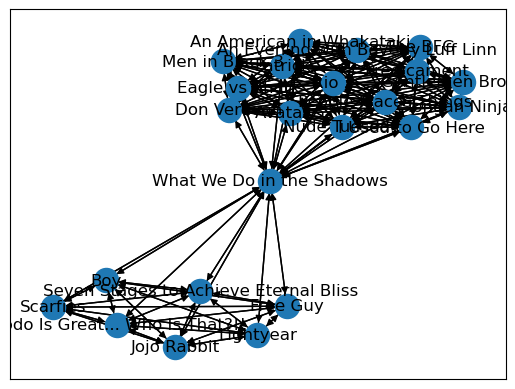

In [ ]:
G1d = nx.DiGraph() #creation of a directed graph
G1d.add_nodes_from(datanew6a["primaryTitle"]) #nodes
G1d.add_edges_from(edgel1l2directed) #edges
nx.draw_networkx(G1d)

In [ ]:
pagerank(G1d) #testing with the prebuild pagerank algorithm with Networkx

{'An American in Whakataki': 0.045513937404677615,
 'An Evening with Beverly Luff Linn': 0.045513937404677615,
 'Avatar 5': 0.045513937404677615,
 'Boy': 0.03466009967403101,
 'Don Verdean': 0.045513937404677615,
 'Eagle vs Shark': 0.045513937404677615,
 'Free Guy': 0.03466009967403101,
 'Frodo Is Great... Who Is That?!!': 0.03466009967403101,
 'Gentlemen Broncos': 0.045513937404677615,
 'I Used to Go Here': 0.045513937404677615,
 'Jojo Rabbit': 0.03466009967403101,
 'Lightyear': 0.03466009967403101,
 'Men in Black 3': 0.045513937404677615,
 'Nude Tuesday': 0.045513937404677615,
 'Patrick': 0.045513937404677615,
 'People Places Things': 0.045513937404677615,
 'Predicament': 0.045513937404677615,
 'Rio 2': 0.045513937404677615,
 'Scarfies': 0.03466009967403101,
 'Seven Stages to Achieve Eternal Bliss': 0.03466009967403101,
 'The BFG': 0.045513937404677615,
 'Tongan Ninja': 0.045513937404677615,
 'What We Do in the Shadows': 0.07467024121161804}

In [ ]:
nx. write_gexf(G1d, "test5.gexf")

In [ ]:
##not everyone is correctly credited so the graphic won't be perfect, ex: Taika Waititi isn't credited for Thor: Love and Thunder as an actor 

In order to create a bigger network to test, I now further filter the dataset, restricting the time window to the last 5 years, to 2020 and 2021, and to 2020 only and avoiding title repetition by filtering out movie titles used outside of the US.

In [ ]:
datatoprep2 =pd.read_csv("./networkprep.csv") #import file from the Dataset Preparation (Kaggle and Google Drive) folder 
datatoprep2.head()

,tconst,primaryTitle,startYear,runtimeMinutes,genres,nconst,primaryName,birthYear,deathYear,primaryProfession,ordering,category,characters,freq
0,tt6915008,#1,\N,\N,Documentary,nm0285330,Forbes Riley,1960,\N,"actress,producer",2,actress,\N,6
1,tt6915008,#1,\N,\N,Documentary,nm0634760,Peter Noone,1947,\N,"actor,soundtrack",1,actor,\N,6
2,tt6915008,#1,\N,\N,Documentary,nm1643411,Tommy James,1947,\N,"soundtrack,composer",5,actor,\N,2
3,tt6915008,#1,\N,\N,Documentary,nm1866067,Scotty Bowman,1933,\N,actor,6,actor,\N,2
4,tt2346170,#1 Serial Killer,2013,87,Horror,nm0002245,Tzi Ma,\N,\N,"actor,producer",3,actor,"[""Mr. Chang""]",15


In [ ]:
datatoprep3= datatoprep2.dropna(subset=['startYear'])
datatoprep3a= datatoprep3[(datatoprep3["startYear"] != "\\N")]
datatoprep3b= datatoprep3a[(datatoprep3a["startYear"] >= "1992")]

In [ ]:
datatoprep3b.head()

,tconst,primaryTitle,startYear,runtimeMinutes,genres,nconst,primaryName,birthYear,deathYear,primaryProfession,ordering,category,characters,freq
4,tt2346170,#1 Serial Killer,2013,87,Horror,nm0002245,Tzi Ma,\N,\N,"actor,producer",3,actor,"[""Mr. Chang""]",15
5,tt2346170,#1 Serial Killer,2013,87,Horror,nm2104193,Shoshana Bush,1988,\N,"actress,director,writer",4,actress,"[""Tricia Arnold""]",7
6,tt2346170,#1 Serial Killer,2013,87,Horror,nm0864937,Jason Tobin,\N,\N,"actor,director,writer",1,actor,"[""Eddy Tsai""]",7
7,tt2346170,#1 Serial Killer,2013,87,Horror,nm1067699,Eugenia Yuan,1976,\N,"actress,miscellaneous,sound_department",2,actress,"[""Karena Lee""]",12
8,tt21982418,#4 Mangifera,2022,52,"Biography,Documentary,Drama",nm1411240,Flávia Gusmão,1978,\N,"miscellaneous,actress,producer",1,actress,"[""(Self)""]",6


In [ ]:
datatoprep3b.shape

(809321, 14)

In [ ]:
datatoprep3b.loc[datatoprep3b['genres'].str.contains('documentary', case=False), 'isdocu'] = 'docu' 

C:\Users\carla\AppData\Local\Temp\ipykernel_12520\1821293280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datatoprep3b.loc[datatoprep3b['genres'].str.contains('documentary', case=False), 'isdocu'] = 'docu'


In [ ]:
datatoprep3b.head()

,tconst,primaryTitle,startYear,runtimeMinutes,genres,nconst,primaryName,birthYear,deathYear,primaryProfession,ordering,category,characters,freq,isdocu
4,tt2346170,#1 Serial Killer,2013,87,Horror,nm0002245,Tzi Ma,\N,\N,"actor,producer",3,actor,"[""Mr. Chang""]",15,NaN
5,tt2346170,#1 Serial Killer,2013,87,Horror,nm2104193,Shoshana Bush,1988,\N,"actress,director,writer",4,actress,"[""Tricia Arnold""]",7,NaN
6,tt2346170,#1 Serial Killer,2013,87,Horror,nm0864937,Jason Tobin,\N,\N,"actor,director,writer",1,actor,"[""Eddy Tsai""]",7,NaN
7,tt2346170,#1 Serial Killer,2013,87,Horror,nm1067699,Eugenia Yuan,1976,\N,"actress,miscellaneous,sound_department",2,actress,"[""Karena Lee""]",12,NaN
8,tt21982418,#4 Mangifera,2022,52,"Biography,Documentary,Drama",nm1411240,Flávia Gusmão,1978,\N,"miscellaneous,actress,producer",1,actress,"[""(Self)""]",6,docu


In [ ]:
datatoprep3c= datatoprep3b[(datatoprep3b["isdocu"] != "docu")] #filter out most documentaries

In [ ]:
datatoprep3c.shape

(781581, 15)

In [ ]:
filelang = ('title.akas.tsv/data.tsv')
datalang = pd.read_csv(filelang, sep='\t')

In [ ]:

datalang.head()

C:\Users\carla\AppData\Local\Temp\ipykernel_4896\101735126.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  datalang=pd.read_csv("C:/Users/carla/Downloads/archivio/title.akas.tsv/data.tsv", sep='\t')


,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0


In [ ]:
#needed to filter out titles for international release

In [ ]:
datalang = datalang.rename(columns={"titleId": "tconst"}, errors="raise")

In [ ]:
datatoprep3d = pd.merge(left=datatoprep3c, right=datalang, on='tconst')

In [ ]:
datatoprep3d.head()

,tconst,primaryTitle,startYear,runtimeMinutes,genres,nconst,primaryName,birthYear,deathYear,primaryProfession,...,category,characters,freq,ordering_y,title,region,language,types,attributes,isOriginalTitle
0,tt2346170,#1 Serial Killer,2013,87,Horror,nm0002245,Tzi Ma,\N,\N,"actor,producer",...,actor,"[""Mr. Chang""]",15,1,Chink,\N,\N,working,\N,0
1,tt2346170,#1 Serial Killer,2013,87,Horror,nm0002245,Tzi Ma,\N,\N,"actor,producer",...,actor,"[""Mr. Chang""]",15,2,#1 Serial Killer,\N,\N,original,\N,1
2,tt2346170,#1 Serial Killer,2013,87,Horror,nm0002245,Tzi Ma,\N,\N,"actor,producer",...,actor,"[""Mr. Chang""]",15,3,#1 Serial Killer,US,\N,imdbDisplay,\N,0
3,tt2346170,#1 Serial Killer,2013,87,Horror,nm2104193,Shoshana Bush,1988,\N,"actress,director,writer",...,actress,"[""Tricia Arnold""]",7,1,Chink,\N,\N,working,\N,0
4,tt2346170,#1 Serial Killer,2013,87,Horror,nm2104193,Shoshana Bush,1988,\N,"actress,director,writer",...,actress,"[""Tricia Arnold""]",7,2,#1 Serial Killer,\N,\N,original,\N,1


In [ ]:
datatoprep3d = datatoprep3d.dropna(subset=['region'])

In [ ]:
datatoprep3d = datatoprep3d[(datatoprep3d["region"] == "US")] #each movie has several potential release names. we restrict at the one used in the US

In [ ]:
datatoprep3d.head()

,tconst,primaryTitle,startYear,runtimeMinutes,genres,nconst,primaryName,birthYear,deathYear,primaryProfession,...,characters,freq,isdocu,ordering_y,title,region,language,types,attributes,isOriginalTitle
2,tt2346170,#1 Serial Killer,2013,87,Horror,nm0002245,Tzi Ma,\N,\N,"actor,producer",...,"[""Mr. Chang""]",15,NaN,3,#1 Serial Killer,US,\N,imdbDisplay,\N,0
5,tt2346170,#1 Serial Killer,2013,87,Horror,nm2104193,Shoshana Bush,1988,\N,"actress,director,writer",...,"[""Tricia Arnold""]",7,NaN,3,#1 Serial Killer,US,\N,imdbDisplay,\N,0
8,tt2346170,#1 Serial Killer,2013,87,Horror,nm0864937,Jason Tobin,\N,\N,"actor,director,writer",...,"[""Eddy Tsai""]",7,NaN,3,#1 Serial Killer,US,\N,imdbDisplay,\N,0
11,tt2346170,#1 Serial Killer,2013,87,Horror,nm1067699,Eugenia Yuan,1976,\N,"actress,miscellaneous,sound_department",...,"[""Karena Lee""]",12,NaN,3,#1 Serial Killer,US,\N,imdbDisplay,\N,0
13,tt4470336,#50Fathers,2015,132,Comedy,nm7388410,Antonio Barrios,\N,\N,actor,...,"[""Broadway Social Club Thug""]",3,NaN,2,#50Fathers,US,\N,imdbDisplay,\N,0


In [ ]:
datatoprep3d.shape

(428517, 22)

In [ ]:
datatoprep3g= datatoprep3d[(datatoprep3d["startYear"] >= "2017")]

In [ ]:
datatoprep3g.shape

(134857, 22)

In [ ]:
datatoprep3g= datatoprep3g[['tconst', 'primaryTitle', 'nconst', 'primaryName']]
datatoprep3g.head()

,tconst,primaryTitle,nconst,primaryName
32,tt18673736,#69 Samskar Colony,nm2496992,Ajay
42,tt18673736,#69 Samskar Colony,nm9855560,Fm Babai
52,tt18673736,#69 Samskar Colony,nm12269045,Badram
81,tt10620868,#Alive,nm2584860,Yoo Ah-in
117,tt10620868,#Alive,nm7270573,Hyun-Wook Lee


In [ ]:
compression_opts = dict(method='zip',
                        archive_name='data1722forjson.csv')  
datatoprep3g.to_csv('data17222forjson.zip', index=False,
          compression=compression_opts)

In [ ]:
datatoprep3g['movieactorlist'] = list(zip(datatoprep3g.primaryTitle, datatoprep3g.primaryName)) 
l1 , l2 = listcreation(datatoprep3g)
edges3g = edgelistdirected(l1, l2) #it works

In [ ]:
datatoprep3h= datatoprep3d[(datatoprep3d["startYear"] == "2020")]
datatoprep3h= datatoprep3h[['tconst', 'primaryTitle', 'nconst', 'primaryName']]
datatoprep3h.head()

,tconst,primaryTitle,nconst,primaryName
81,tt10620868,#Alive,nm2584860,Yoo Ah-in
117,tt10620868,#Alive,nm7270573,Hyun-Wook Lee
153,tt10620868,#Alive,nm3482978,Jeon Bae-soo
189,tt10620868,#Alive,nm2339975,Park Shin-Hye
410,tt11640412,#FriendButMarried 2,nm3040499,Vonny Cornellya


In [ ]:
compression_opts = dict(method='zip',
                        archive_name='data20forjson.csv')  
datatoprep3g.to_csv('data20forjson.zip', index=False,
          compression=compression_opts)

In [ ]:
datatoprep3h['movieactorlist'] = list(zip(datatoprep3h.primaryTitle, datatoprep3h.primaryName))

In [ ]:
l1 , l2 = listcreation(datatoprep3h)
edges3h = edgelistdirected(l1, l2) #works too

In [ ]:
datatoprep4= datatoprep3d[(datatoprep3d["startYear"] == "2020") |(datatoprep3d["startYear"] == "2021")]

In [ ]:
datatoprep4= datatoprep4[['tconst', 'primaryTitle', 'nconst', 'primaryName']]

In [ ]:
compression_opts = dict(method='zip',
                        archive_name='data2021forjson.csv')  
datatoprep4.to_csv('data2021forjson.zip', index=False,
          compression=compression_opts)
datatoprep4


,tconst,primaryTitle,nconst,primaryName
81,tt10620868,#Alive,nm2584860,Yoo Ah-in
117,tt10620868,#Alive,nm7270573,Hyun-Wook Lee
153,tt10620868,#Alive,nm3482978,Jeon Bae-soo
189,tt10620868,#Alive,nm2339975,Park Shin-Hye
296,tt14676376,#Challenge,nm0639232,Flor Núñez
...,...,...,...,...
4601353,tt14050808,Întregalde,nm1574827,Maria Popistasu
4601365,tt14050808,Întregalde,nm3712654,Alex Bogdan
4602511,tt12283154,Самая любимая,nm2798316,Yuriy Baturin
4602516,tt12283154,Самая любимая,nm4535020,Larisa Karasina
